### **Task-1**

In [ ]:
# import required libraries
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#define a function to built a graph with arguments as list of nodes and edges

def buildGraph(nodes, edges):
    G = nx.Graph()                     #define a graph 
    G.add_nodes_from(nodes)            #add nodes to the graph from list "nodes"
    G.add_edges_from(edges)            #add edges to the graph from lis "edges"

    np.random.seed(475)
    plt.subplot()
    nx.draw(G, with_labels=True, font_weight='bold')  #draw the graph
    return G


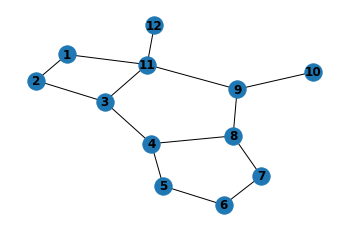

In [ ]:
nodes_1=[1,2,3,4,5,6,7,8,9,10,11,12]                                                                 #list of node
edges_1=[(1,2),(2,3),(3,4),(3,11),(4,5),(4,8),(5,6),(6,7),(7,8),(8,9),(9,10),(9,11),(1,11),(11,12)]  #list of egdes
Graph_1 = buildGraph(nodes_1,edges_1)                                                                        #buitd a graph as G

In [ ]:
adj_data_1 = nx.adjacency_data(Graph_1)['adjacency']
adj_data_1

[[{'id': 2}, {'id': 11}],
 [{'id': 1}, {'id': 3}],
 [{'id': 2}, {'id': 4}, {'id': 11}],
 [{'id': 3}, {'id': 5}, {'id': 8}],
 [{'id': 4}, {'id': 6}],
 [{'id': 5}, {'id': 7}],
 [{'id': 6}, {'id': 8}],
 [{'id': 4}, {'id': 7}, {'id': 9}],
 [{'id': 8}, {'id': 10}, {'id': 11}],
 [{'id': 9}],
 [{'id': 3}, {'id': 9}, {'id': 1}, {'id': 12}],
 [{'id': 11}]]

In [ ]:
#define a function for representing graph as adjacency list with adjacency data as argument
def graph_to_adj_list(adj_data):
    adj_list = {}                        #define a dictionary for representing adjacency list
    key = 1
    for data in adj_data:
        values = [str(d['id']) for d in data]
        adj_list[str(key)] = values
        key += 1
    return adj_list

In [ ]:
adjacency_list_1 = graph_to_adj_list(adj_data_1)
adjacency_list_1

{'1': ['2', '11'],
 '10': ['9'],
 '11': ['3', '9', '1', '12'],
 '12': ['11'],
 '2': ['1', '3'],
 '3': ['2', '4', '11'],
 '4': ['3', '5', '8'],
 '5': ['4', '6'],
 '6': ['5', '7'],
 '7': ['6', '8'],
 '8': ['4', '7', '9'],
 '9': ['8', '10', '11']}

### **BFS**

In [ ]:
#define an algorithm for finding bfs algorithm and print visited nodes
#argument to the function are adjecency list(graph), visited list and starting node

def bfs(graph,visited, start_node):
  node = str(start_node)                 #convert starting node to string
  visited.append(node)                   #add starting node to viisted list and queue
  queue.append(node)
  path_nodes=[]                         #define a list for saving nodes in the path

  while queue:                          #while queue is nt empty
    d = queue.pop(0)                    #remove first element from the queue
    path_nodes.append(d)                #add current node to the list path_nodes   

    for neighbour in graph[d]:          #iterate over each neighbour of node d
      if neighbour not in visited:      #if neigbour not visited
        visited.append(neighbour)       #add the neighbour to the visited list and queue
        queue.append(neighbour)
 
  return path_nodes

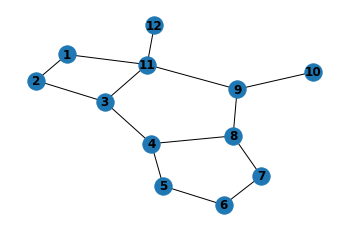

In [ ]:
buildGraph(nodes_1,edges_1)

In [ ]:
visited=[]                              #define visited list
queue=[]                                #define a list queue
visited_nodes=bfs(adjacency_list_1,visited,1)   #call bfs with starting node as 1

for  node in visited_nodes:
  print(node, end=' ')

1 2 11 3 9 12 4 8 10 5 7 6 

### **DFS**

In [ ]:
#define a function for implementing dfs algorithm and print visited nodes

def dfs(graph,visited, start_node):
  node=str(start_node)                 #convert start_node to string

  if node not in visited:              #if node not in visited list
    print(node, end=' ')               #print the node
    visited.append(node)               #add node to the visited list
    for neighbour in graph[node]:      #iterate over neigbours of present node
      dfs(graph,visited, neighbour)    #call dfs function recursively with neighbour as start_node

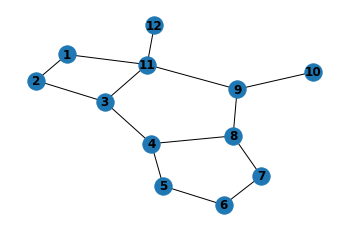

In [ ]:
buildGraph(nodes_1,edges_1)

In [ ]:
visited=[]                                #define a list visited
dfs(adjacency_list_1, visited, 11)          #call dfs function with start node as 11

11 3 2 1 4 5 6 7 8 9 10 12 

### **Task-2**

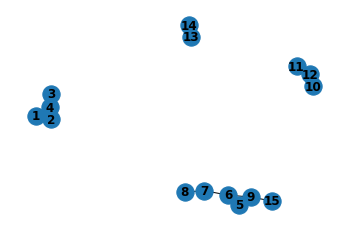

In [ ]:
#define nodes and edges and build a graph using buildGraph() function

nodes_2=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]                                                                        
edges_2=[(1,2),(1,4),(2,4),(4,3),(5,6),(5,9),(6,9),(6,7),(7,8),(11,12),(10,12),(13,14),(9,15)]                            
Graph_2 = buildGraph(nodes_2,edges_2) 

In [ ]:
adj_data_2 = nx.adjacency_data(Graph_2)['adjacency']                  #create an ajacency data dictionary
adjacency_list_2 = graph_to_adj_list(adj_data_2)                      #by using this create adjacency list for graph_2
adjacency_list_2

{'1': ['2', '4'],
 '10': ['12'],
 '11': ['12'],
 '12': ['11', '10'],
 '13': ['14'],
 '14': ['13'],
 '15': ['9'],
 '2': ['1', '4'],
 '3': ['4'],
 '4': ['1', '2', '3'],
 '5': ['6', '9'],
 '6': ['5', '9', '7'],
 '7': ['6', '8'],
 '8': ['7'],
 '9': ['5', '6', '15']}

In [ ]:
visited=[]                                               #define list for saving visited nodes and nodes in a connected component                                              
connected_graphs=[]                                      
for node in nodes_2:                                     #iterate over all nodes
  if node not in visited:                                #if node is not in the visited list
    connected_graphs.append(bfs(adjacency_list_2,visited,node))   #call bfs() function with arguments as adjacency list of graph_2, visited list and current node as starting node
                                                                  #this will return a list of nodes in the connected component


In [ ]:
length=[]                                                     #define a list for save length of each connected component
for i in range(len(connected_graphs)):                        #iterate over all the connected components
  length.append(len(connected_graphs[i]))                     #save length of each connected component

length.sort(reverse=True)                                     #sort the length in decending order and get first two lengths as largest 
for i in range(1,3):                                          #and second largest connected component
  if i==1:
    print('length of largest connected component: %d'%length[i-1])
  if i==2:
    print('length of second largest connected component: %d'%length[i-1])




length of largest connected component: 6
length of second largest connected component: 4


### Task-3

In [ ]:
#dijikstra function with argument as graph, agjacency_list of graph, source_node, list of nodes

import math
def dijikstra(graph,adjacency_list ,source_node,nodes):

  queue=[]
  dist=[]

  for i in range(len(nodes)):
    dist.append(math.inf)
    queue.append(nodes[i])
    
  ind_1 = nodes.index(source_node)
  dist[ind_1]=0
  dist_temp  = dist
  #print(dist)
  #print(queue)

  while queue:
    min_dist = min(dist_temp)
    ind_2 = dist.index(min_dist)
    val = queue[ind_2]
    queue.remove(val)
    u = nodes[ind_2]
    #print(queue)

    for v in adjacency_list[str(u)]:
      alt = dist[ind_2] + graph.get_edge_data(u,int(v))['weight']
      if alt < dist[int(v)-1]:
        dist[int(v)-1] = alt
        dist_temp[int(v)-1]

    for data in dist_temp:
      if data==min_dist:
        indx=dist_temp.index(data)
        dist_temp[indx] = math.inf
    print(dist_temp)
  return dist



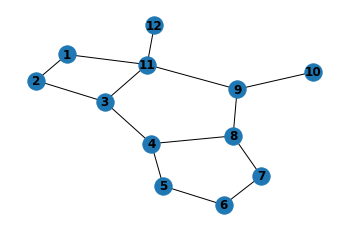

In [ ]:
#in this task we are using Graph_1
buildGraph(nodes_1,edges_1)

In [ ]:
#add weight 1 for all edges
nx.set_edge_attributes(Graph_1, values = 1, name = 'weight')
#Graph_1.get_edge_data(1,2)['weight']
adjacency_list_1

{'1': ['2', '11'],
 '10': ['9'],
 '11': ['3', '9', '1', '12'],
 '12': ['11'],
 '2': ['1', '3'],
 '3': ['2', '4', '11'],
 '4': ['3', '5', '8'],
 '5': ['4', '6'],
 '6': ['5', '7'],
 '7': ['6', '8'],
 '8': ['4', '7', '9'],
 '9': ['8', '10', '11']}

In [ ]:
min_distances=np.empy(shape=(len(nodes_1),len(nodes_1)), dtype='object')      #define a 2d matrix for save min distances between any nodes
                                                                              #row number+1 is source node, column number+1 is target node

for i in range(len(nodes_1)):                                                 #iterate over each node
 min_distances[i,:]= dijikstra(Graph_1, adjacency_list_1, node_1[i],nodes_1)          #call dijikstra function with ith node as source node
                                                                                      #it will return list of min distances between all other nodes

dia=max(min_distances)                                                        #diaameter of the graph is max of min_distance matrix
print("daiameter of the graph is %d"%dia)